In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [132]:
df = pd.read_csv("train.csv")
df.head(10)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,8.40 km/L,0.72 L/10km,0.98 L/10km,208
1,2,TOYOTI,PICKUP TRUCK - SMALL,not-available,6.0,A5,X,7.25 km per L,9.70 L/100km,11.96 L/100km,325
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,9.80 km/L,38.70 mpg Imp.,31.76 mpg Imp.,170
3,4,CHEVO,VAN - PASSENGER,unknown,8.0,A6,X,1.73 L/10km,11.70 liters per 100 km,14.78 liters per 100 km,362
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.10 L/100km,35.76 mpg Imp.,8.01 liters per 100 km,180
5,6,DOGE,MID-SIZE,2.4,4.0,A6,X,8.85 km per L,29.40 MPG (AS),9.81 L/100km,216
6,7,BMV,COMPACT,2.0,unknown,M6,Z,NaN,8.10 liters per 100 km,32.87 mpg Imp.,201
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,19.60 MPG (AS),10.10 km/L,21.28 MPG (AS),221
8,9,KIO,SUV - SMALL,2.4,4.0,AS6,X,13.90 liters per 100 km,NaN,NaN,243
9,10,TOYOTI,PICKUP TRUCK - SMALL,2.7,4.0,M5,X,7.63 km per L,8.90 L/100 km,not-available,297


In [133]:
df.columns

Index(['Id', 'Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'CO2 Emissions(g/km)'],
      dtype='object')

In [134]:
# for col in df.columns:
#     nan_index=df[(df[col]=='unspecified') | 
#         (df[col]=='missing') | 
#         (df[col]=='not-recorded') | 
#         (df[col]=='not-available') |
#         (df[col]=='-1') |
#         (df[col]=='unknown') |
#         (df[col]=='na') |
#         (df[col]=='unestablished') | 
#         (df[col]=='zero') | 
#         (df[col]==-9999) | 
#         (df[col]==-1) | 
#         (df[col]== 0) | 
#         (df[col]== np.nan) ].index
#     df.loc[nan_index,col] = np.nan
# df_checknull=df[["Id", 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']].isnull()
# df_checknull.drop_duplicates(inplace=True)
# print(len(df_checknull))
# print(df_checknull)
# df_checknull.to_excel("Combination NULL.xlsx")
# nan_counts = df[["Id", 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']].isna().sum(axis=1)

# Filter rows with more than 3 NaN values
# result = df[nan_counts > 3]
# print(result)
     

In [135]:
for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

[    1     2     3 ... 54935 54936 54937]
 
['MITSU' 'TOYOTI' 'MATSUDA' 'CHEVO' 'DOGE' 'BMV' 'LECUS' 'KIO' 'FOLD'
 'JIPU' 'NIRRAN' 'CADILUXE' 'FOLKSWA' 'BARUSU' 'GONDA' 'LAND CRAWLER'
 'RYUNDAI' 'TOLVO' 'FIAR' 'ASURA' 'LAMBOGI']
 
['SUV - SMALL' 'PICKUP TRUCK - SMALL' 'COMPACT' 'VAN - PASSENGER'
 'MID-SIZE' 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE'
 'TWO-SEATER' 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' nan
 'STATION WAGON - MID-SIZE' 'MINICOMPACT' 'MINIVAN' 'not-available'
 'not-recorded' 'SPECIAL PURPOSE VEHICLE' 'missing' 'unestablished' 'na'
 'unknown' 'unspecified' 'VAN - CARGO']
 
['1.5' 'not-available' '2.0' 'unknown' '1.8' '2.4' '3.5' '2.7' '1.6' 'na'
 '1.2' '2.5' '3.2' '5.0' '8.4' '1.4' '3.8' 'unestablished' '6.2' nan '4.4'
 '3.0' '3.6' '5.7' '5.2' '6.4' '2.3' 'not-recorded' '3.3' '5.3' 'missing'
 '6.5' '1.0' '4.0' '3.7' '1.3' 'unspecified' '4.6' '4.8' '5.6' '2.8' '6.0'
 '4.2' '4.3' '2.2' '6.6' '5.4' '3.4' '5.8' '6.8']
 
['4.0' '6.0' '8.0' 'unknown' 'na' '3.0' '10.0' '

54937

In [136]:
def CleanData(df, col):
        del_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished') | 
        (df[col]== np.nan) ].index
        df.drop(del_index, inplace=True)
        df.reset_index()    
        return df
col_clean=['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
for col in col_clean:
        df=CleanData(df, col)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
len(df)

37656

In [137]:
np.sum(df.isnull())

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

In [138]:
for column in df.columns:
  print(df[column].unique())
  print(" ")

[    1     3     5 ... 54935 54936 54937]
 
['MITSU' 'MATSUDA' 'TOYOTI' 'DOGE' 'LECUS' 'FOLD' 'KIO' 'JIPU' 'NIRRAN'
 'CADILUXE' 'BARUSU' 'GONDA' 'LAND CRAWLER' 'CHEVO' 'RYUNDAI' 'FOLKSWA'
 'BMV' 'TOLVO' 'FIAR' 'LAMBOGI' 'ASURA']
 
['SUV - SMALL' 'COMPACT' 'MID-SIZE' 'PICKUP TRUCK - SMALL'
 'SUV - STANDARD' 'STATION WAGON - SMALL' 'FULL-SIZE' 'TWO-SEATER'
 'PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'STATION WAGON - MID-SIZE'
 'MINICOMPACT' 'SPECIAL PURPOSE VEHICLE' 'MINIVAN' 'VAN - PASSENGER'
 'VAN - CARGO']
 
['1.5' '2.0' '1.8' '2.4' '3.5' '2.7' '1.6' '1.2' '2.5' '3.2' '5.0' '8.4'
 '1.4' '3.8' '4.4' '3.0' '6.2' '5.7' '5.2' '3.6' '6.4' '2.3' '3.3' '5.3'
 '6.5' '1.0' '4.0' '3.7' '1.3' '4.6' '4.8' '5.6' '2.8' '6.0' '4.2' '4.3'
 '6.6' '5.4' '3.4' '5.8' '6.8' '2.2']
 
['4.0' '6.0' '3.0' '8.0' '10.0' '12.0' '5.0']
 
['AV8' 'AS6' 'M6' 'A6' 'M5' 'A9' 'AS8' 'AV' 'AM6' 'AS9' 'AM7' 'AV7' 'AS10'
 'A8' 'AV6' 'AV10' 'AS5' 'M7' 'A10' 'A4' 'AS7' 'A5' 'AM8' 'AM9' 'A7']
 
['X' 'Z' 'E' 'D' 'N']
 
['8.40 km/L

In [139]:
def is_float(num):
    try:
        float(num)
        return True
    except:
        return False
list_temp=[]

for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(list_word[1])
    except:
        continue
for rec in set(list_temp):
    if(is_float(rec)):
        continue
    else:
        print(rec)

km per L
MPG (AS)
L/100km
L/100 km
mpg Imp.
liters per 100 km
km/L
L/10km


In [140]:
def convert_to_l_per_hundred_km(value, unit):
    if unit=="mpg Imp.":
        return(282.481*float(value))
    elif unit=="liters per 100 km" or unit=="L/100 km" or unit=="L/100km":
        return(float(value))
    elif unit=="km/L" or unit=="km per L":
        return(1/float(value)/100)
    elif unit=="L/10km":
        return(float(value)/10)
    elif unit=="MPG (AS)":
        return(235.215*float(value))

In [141]:
for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
    list_temp=[]
    for record in df[col]:
        try:
            list_word=record.split(" ", 1)
            list_temp.append(convert_to_l_per_hundred_km(list_word[0], list_word[1]))
        except:
            list_temp.append(0)
    df[col] = list_temp

# for rec in list_temp:
#     print(rec)

In [142]:
df.head(10)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,0.001190,0.072000,0.098000,208
2,3,MATSUDA,COMPACT,2.0,4.0,AS6,X,0.001020,10932.014700,8971.596560,170
4,5,TOYOTI,COMPACT,1.8,4.0,M6,X,8.100000,10101.520560,8.010000,180
5,6,DOGE,MID-SIZE,2.4,4.0,A6,X,0.001130,6915.321000,9.810000,216
7,8,LECUS,MID-SIZE,3.5,6.0,AS6,X,4610.214000,0.000990,5005.375200,221
9,10,TOYOTI,PICKUP TRUCK - SMALL,2.7,4.0,M5,X,0.001311,8.900000,0.000000,297
10,11,FOLD,SUV - STANDARD,3.5,6.0,AS6,X,3457.660500,0.001181,0.141000,347
11,12,MATSUDA,SUV - SMALL,2.0,4.0,AS6,X,0.000920,6287.296950,0.000902,192
12,13,KIO,SUV - SMALL,2.4,4.0,AS6,X,0.001160,9974.404110,9.980000,237
13,14,JIPU,SUV - SMALL,2.4,4.0,A9,X,12.300000,0.094000,5031.248850,235


In [144]:
def remove_zeros(df, column_name=""):
  df = df[df[column_name] != 0]
  df.reset_index()
  return df

In [145]:
#Removing Outliers
def remove_outliers(df, column_name=""):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)

  IQR = q3 - q1

  lower_limit = q1 - 1.5 * IQR
  upper_limit = q3 + 1.5 * IQR

  df = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]
  df.reset_index()
  df=remove_zeros(df, column_name)
  return df


In [146]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")
df = remove_outliers(df,"CO2 Emissions(g/km)")

In [147]:
df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)"]].describe()


,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,14937.000000,14937.000000,14937.000000,14937.000000
mean,6.212876,4.603752,5.502969,244.382406
std,6.787138,4.805453,5.842277,64.321065
min,0.000420,0.000460,0.000451,96.000000
25%,0.001490,0.001050,0.001299,197.000000
50%,0.201000,5.700000,4.580000,232.000000
75%,11.700000,8.500000,10.310000,286.000000
max,30.000000,20.400000,24.270000,427.000000


In [114]:
# replace_value=[]
# columns=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
#        'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
#        'Fuel Consumption Comb']
# for col in columns:
#     try:
#         replace_value.append(np.mean(df[col]))
#     except:
#         print(col)
#         replace_value.append(df[col].mode()[0])
# print(replace_value)

Make
Vehicle Class
Engine Size(L)
Cylinders
Transmission
Fuel Type
['FOLD', 'SUV - SMALL', '2.0', '4.0', 'AS6', 'X', 6.212876156934603, 4.603751827897578, 5.502969338668029]


In [115]:
df.dtypes

Id                         int64
Make                      object
Vehicle Class             object
Engine Size(L)            object
Cylinders                 object
Transmission              object
Fuel Type                 object
Fuel Consumption City    float64
Fuel Consumption Hwy     float64
Fuel Consumption Comb    float64
CO2 Emissions(g/km)        int64
dtype: object

In [116]:
# df=pd.read_csv('train.csv')
# for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
#     list_temp=[]
#     for record in df[col]:
#         try:
#             list_word=record.split(" ", 1)
#             list_temp.append(convert_to_l_per_hundred_km(list_word[0], list_word[1]))
#         except:
#             list_temp.append(0)
#     df[col] = list_temp

# def FillData(df, col, value_for_replace):
#         wrong_index=df[
#         (df[col]=='unspecified') | 
#         (df[col]=='missing') | 
#         (df[col]=='not-recorded') | 
#         (df[col]=='not-available') |
#         (df[col]=='-1') |
#         (df[col]=='unknown') |
#         (df[col]=='na') |
#         (df[col]=='unestablished') |
#         (df[col]=='zero')].index
#         df.loc[wrong_index, col]=value_for_replace
#         df[col].fillna(value_for_replace, inplace=True)
#         print(df[col].unique())
#         return df
# col_clean=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
#        'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
#        'Fuel Consumption Comb']
# for i in range(len(col_clean)):
#         df=FillData(df, col_clean[i], replace_value[i])
# for column in df.columns:
#   print(df[column].unique())
#   print(" ")
# df.drop_duplicates(inplace=True)
# len(df)

In [117]:
np.sum(df.isnull())

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

In [118]:
df.describe()

,Id,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,14937.000000,14937.000000,14937.000000,14937.000000,14937.000000
mean,27513.566981,6.212876,4.603752,5.502969,244.382406
std,15857.270498,6.787138,4.805453,5.842277,64.321065
min,1.000000,0.000420,0.000460,0.000451,96.000000
25%,13918.000000,0.001490,0.001050,0.001299,197.000000
50%,27572.000000,0.201000,5.700000,4.580000,232.000000
75%,41155.000000,11.700000,8.500000,10.310000,286.000000
max,54935.000000,30.000000,20.400000,24.270000,427.000000


In [119]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")
df = remove_outliers(df,"CO2 Emissions(g/km)")

In [120]:
def visualize_sorted_mean(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])

  fig, ax = plt.subplots(figsize=(7,10))
  bar_width = 0.4

  bar1 = ax.barh(np.arange(len(cols)), [dict_col[:][i][1][0] for i in range(len(dict_col))], height=bar_width, color='yellow', alpha=0.5, label='Average')
  bar2 = ax.barh(np.arange(len(cols)) + bar_width, [dict_col[:][i][1][1] for i in range(len(dict_col))], height=bar_width, color='orange', alpha=0.5, label='Median')

  ax.set_yticks(np.arange(len(cols)) + bar_width / 2)
  ax.set_yticklabels(dict_col)
  ax.set_xlabel('CO2 Emissions(g/km)')
  ax.set_ylabel(column_name)
  ax.set_title('Visualization of CO2 emissions by ' + column_name)
  ax.legend()

  plt.show()

def generate_dict(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])
  return dict_col, avg

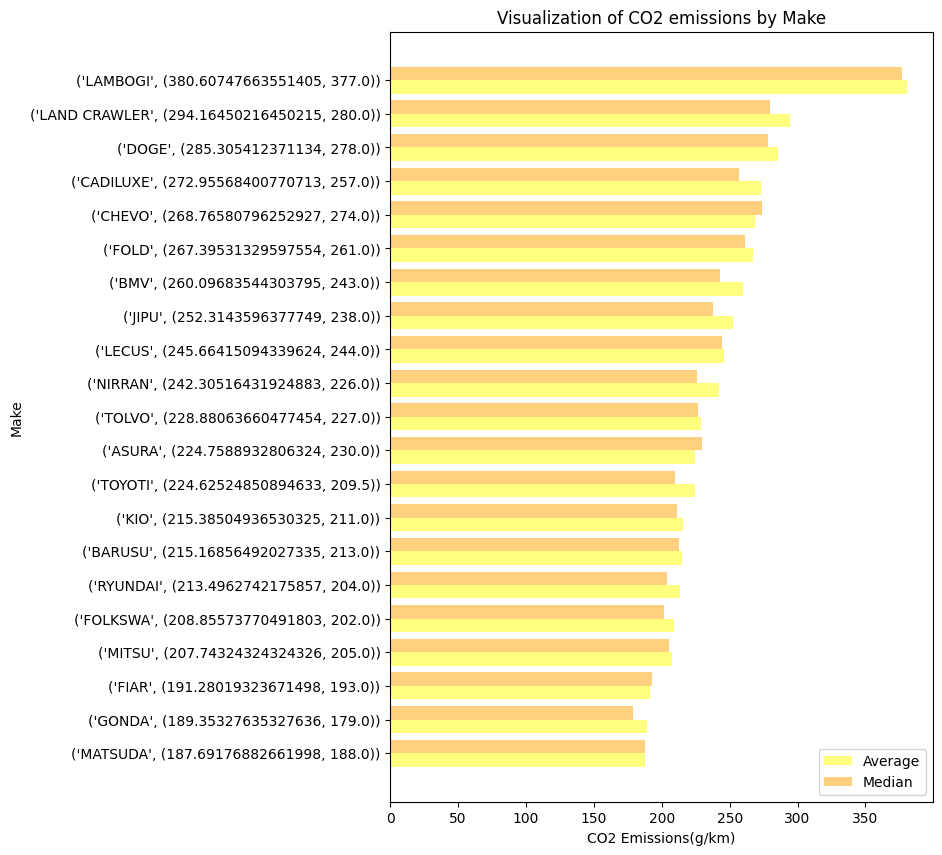

In [121]:
visualize_sorted_mean(df, "Make")

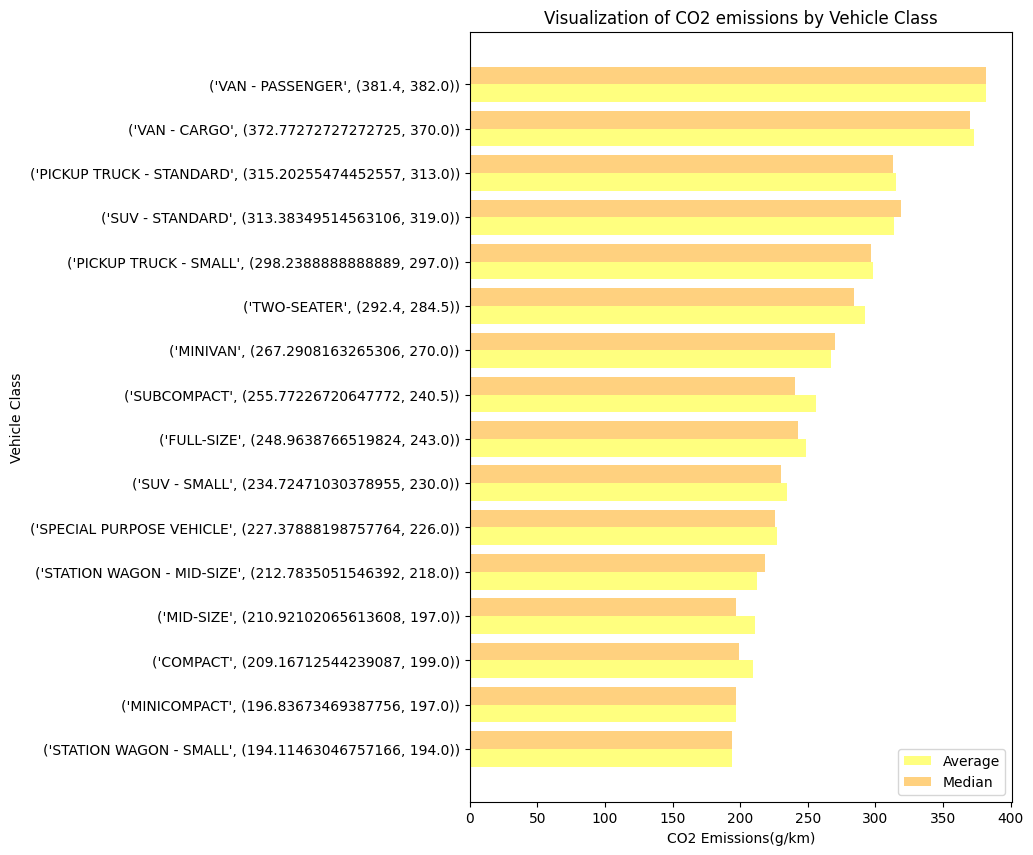

In [122]:
visualize_sorted_mean(df, "Vehicle Class")

In [123]:
def AddAvgColumn(df, column_name):
    make_map={}
    dict_col, avg=generate_dict(df, column_name)
    for i in range(len(dict_col)):
        make_map[dict_col[i][0]]=avg[i]
    new_col=column_name+"Avg"
    df[new_col]=df[column_name].map(make_map)
    # df[new_col] = (df[new_col]-df[new_col].min())/df[new_col].max()
    # df[new_col] = (df[new_col]-192.6185147143735)/271.26871156214463
    
    print(make_map)
    return df

In [124]:
df=AddAvgColumn(df, "Make")
df=AddAvgColumn(df, "Vehicle Class")
df=AddAvgColumn(df, "Transmission")
df=AddAvgColumn(df, "Fuel Type")

{'MATSUDA': 207.74324324324326, 'GONDA': 215.16856492027335, 'FIAR': 189.35327635327636, 'MITSU': 294.16450216450215, 'FOLKSWA': 268.76580796252927, 'RYUNDAI': 213.4962742175857, 'BARUSU': 208.85573770491803, 'KIO': 215.38504936530325, 'TOYOTI': 245.66415094339624, 'ASURA': 260.09683544303795, 'TOLVO': 285.305412371134, 'NIRRAN': 191.28019323671498, 'LECUS': 187.69176882661998, 'JIPU': 272.95568400770713, 'BMV': 267.39531329597554, 'FOLD': 224.62524850894633, 'CHEVO': 380.60747663551405, 'CADILUXE': 252.3143596377749, 'DOGE': 224.7588932806324, 'LAND CRAWLER': 242.30516431924883, 'LAMBOGI': 228.88063660477454}
{'STATION WAGON - SMALL': 234.72471030378955, 'MINICOMPACT': 209.16712544239087, 'COMPACT': 313.38349514563106, 'MID-SIZE': 248.9638766519824, 'STATION WAGON - MID-SIZE': 210.92102065613608, 'SPECIAL PURPOSE VEHICLE': 255.77226720647772, 'SUV - SMALL': 194.11463046757166, 'FULL-SIZE': 315.20255474452557, 'SUBCOMPACT': 196.83673469387756, 'MINIVAN': 292.4, 'TWO-SEATER': 227.378881

In [125]:
df.head(5)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,0.00119,0.07200,0.098000,208,294.164502,194.114630,248.198113,268.160898
17,18,MITSU,COMPACT,1.2,3.0,AV,X,0.00079,0.00079,7.900000,167,294.164502,313.383495,220.368421,268.160898
19,20,BARUSU,COMPACT,2.5,4.0,M6,Z,15.90000,0.09500,13.020000,305,208.855738,313.383495,184.421053,232.274834
22,23,GONDA,SUV - SMALL,3.5,6.0,A6,X,11.40000,10.50000,0.110000,263,215.168565,194.114630,303.904762,268.160898
25,26,LAND CRAWLER,SUV - STANDARD,5.0,8.0,AS8,E,0.00177,0.11600,0.001495,367,242.305164,267.290816,194.222628,207.000000


In [126]:
print(df['MakeAvg'].unique())

[294.16450216 208.8557377  215.16856492 242.30516432 380.60747664
 213.49627422 268.76580796 215.38504937 187.69176883 267.3953133
 224.75889328 189.35327635 207.74324324 252.31435964 224.62524851
 245.66415094 228.8806366  272.95568401 260.09683544 191.28019324
 285.30541237]


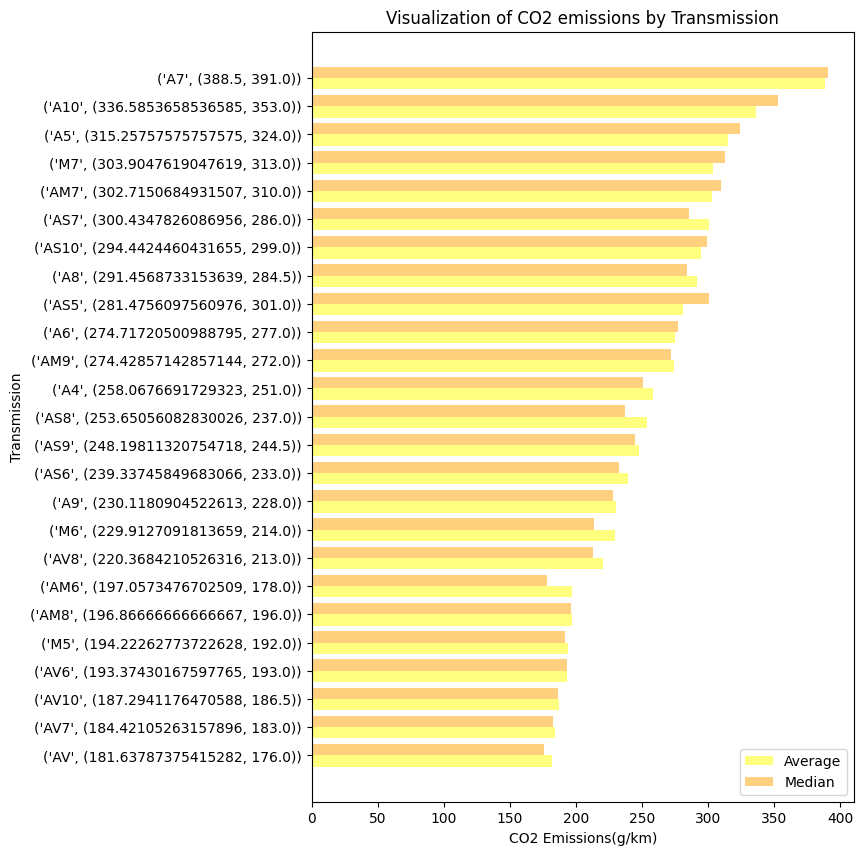

In [127]:
# col_trans=df["Transmission"].unique()
# trans_avg=[np.average(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]
# trans_median=[np.median(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]

# fig, ax = plt.subplots(figsize=(7,10))
# bar_width = 0.4

# bar1 = ax.barh(np.arange(len(col_trans)), trans_avg, height=bar_width, color='yellow', alpha=0.5, label='Average')
# bar2 = ax.barh(np.arange(len(col_trans)) + bar_width, trans_median, height=bar_width, color='orange', alpha=0.5, label='Median')

# ax.set_yticks(np.arange(len(col_trans)) + bar_width / 2)
# ax.set_yticklabels(col_trans)
# ax.set_xlabel('CO2 Emissions(g/km)')
# ax.set_ylabel('Transmission')
# ax.set_title('Visualization of CO2 emissions by Transmission')
# ax.legend()

# plt.show()
visualize_sorted_mean(df, "Transmission")


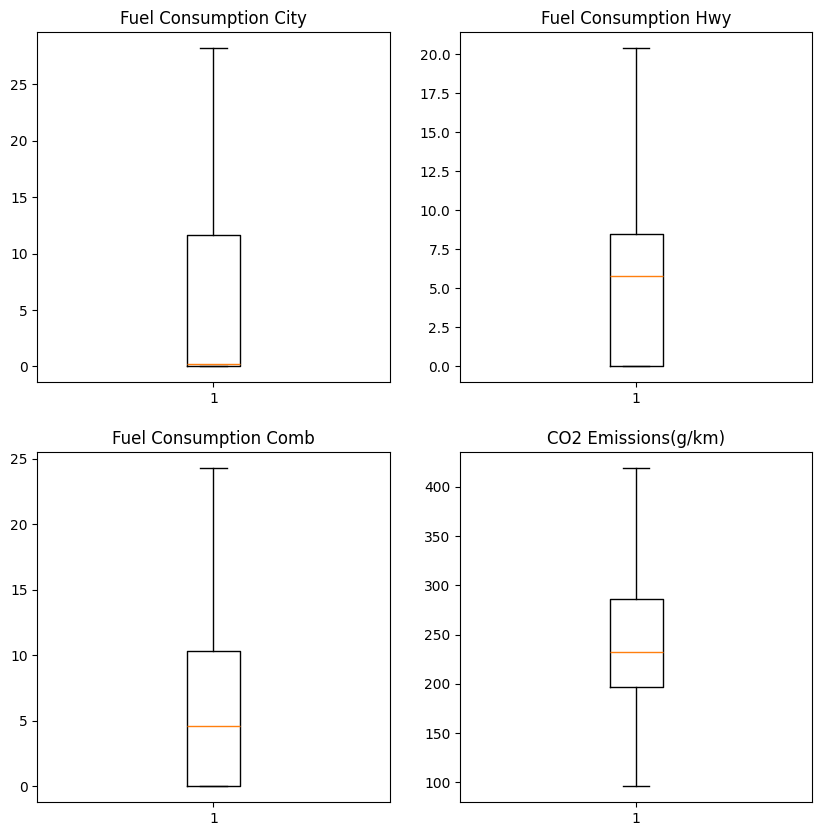

In [128]:
col_box=['Fuel Consumption City', 'Fuel Consumption Hwy','Fuel Consumption Comb', "CO2 Emissions(g/km)"]
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(col)
    i+=1
plt.show()

In [129]:
#['X' 'E' 'Z' nan 'D' '-1' 'missing' 'unspecified' 'not-recorded' 'unknown', 'unestablished' 'na' 'not-available' 'N']
# len(df[df["Fuel Type"=="unknown"]])
df["Fuel Type"].value_counts()

Fuel Type
X    9558
Z    4276
E     742
D     302
N       2
Name: count, dtype: int64

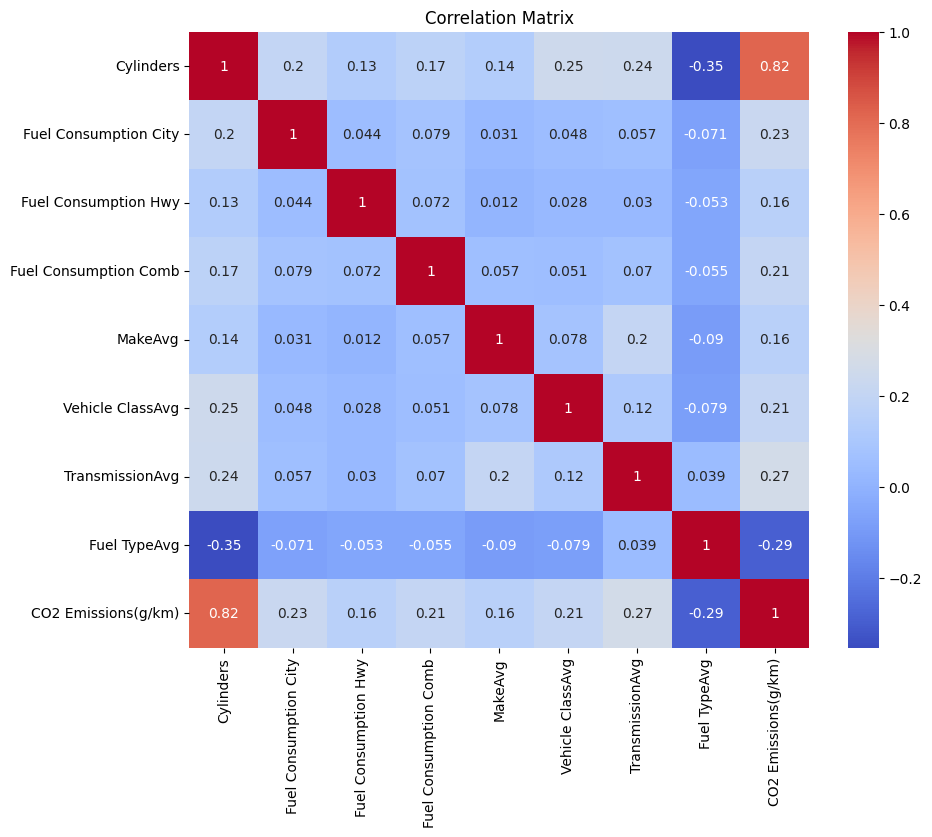

In [130]:
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "MakeAvg","Make",  "Cylinders", "Engine Size(L)"]].corr()
corr=df[['Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb', 'MakeAvg',
       'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg', "CO2 Emissions(g/km)"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

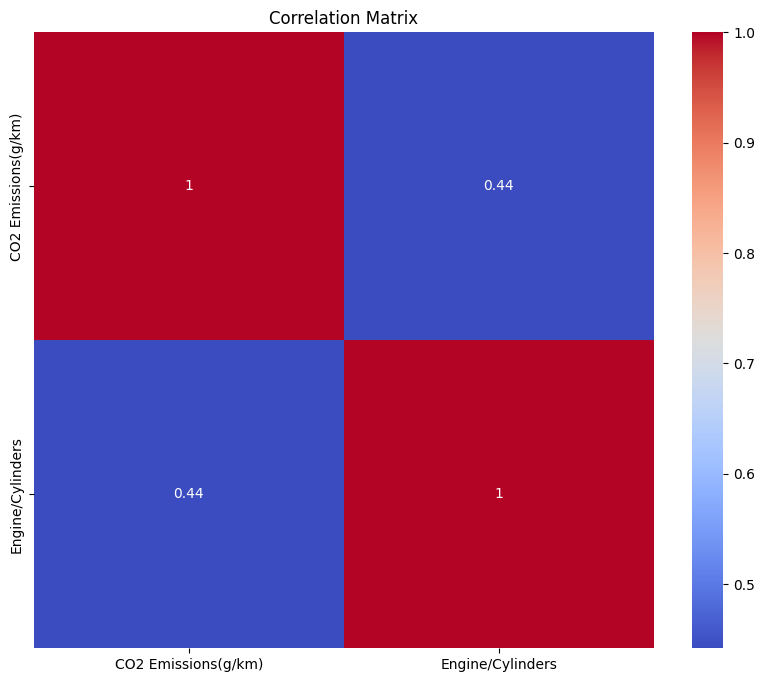

In [91]:
df["Engine/Cylinders"]=df["Engine Size(L)"].astype(float)/df["Cylinders"].astype(float)
corr=df[["CO2 Emissions(g/km)", "Engine/Cylinders"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

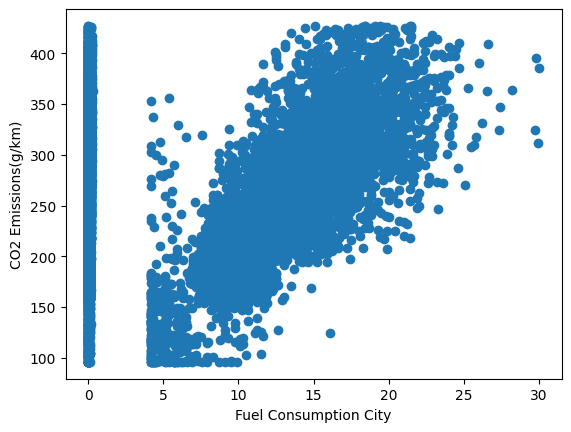

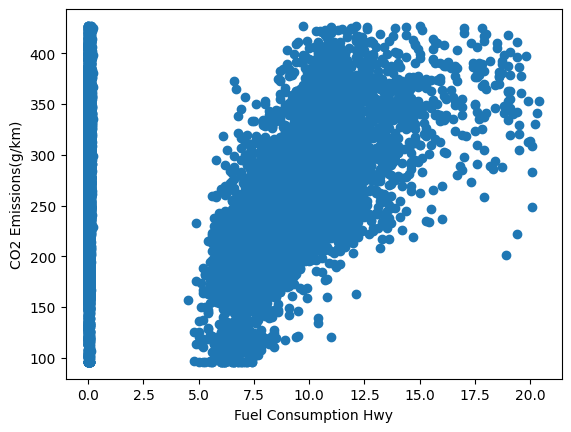

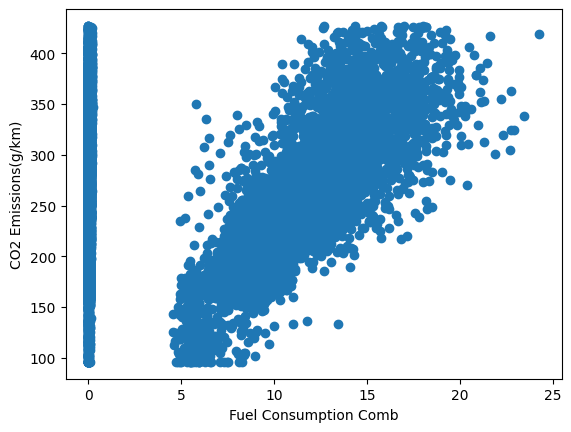

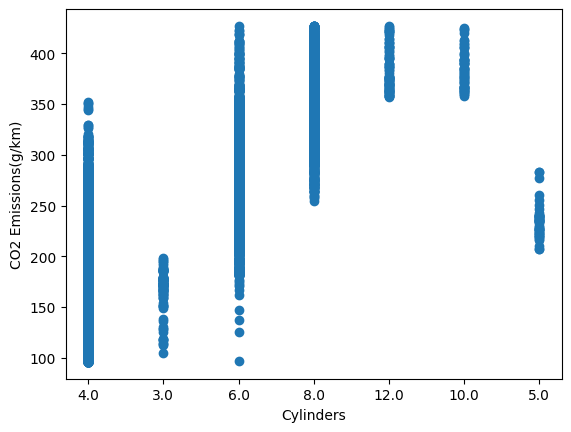

In [148]:
plt.scatter(df["Fuel Consumption City"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Hwy"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Comb"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

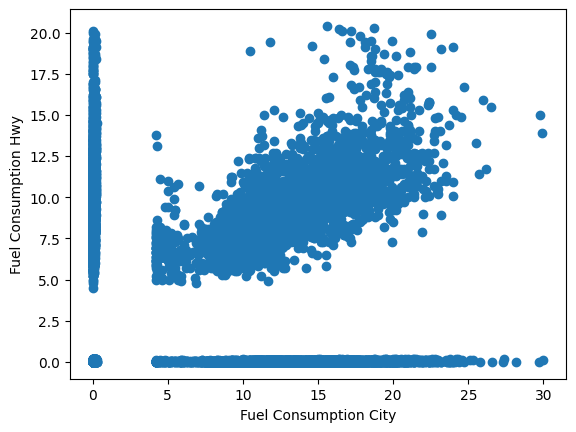

In [149]:
# del_index=df[(df["Fuel Consumption City"]>15000) | (df["Fuel Consumption Hwy"]>15000) | (df["Fuel Consumption Comb"]>800)].index
del_index=df[(df["Fuel Consumption City"]>15000000)].index
df.drop(del_index, inplace=True)
df.reset_index()
plt.scatter(df["Fuel Consumption City"], df["Fuel Consumption Hwy"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("Fuel Consumption Hwy")  
plt.show()

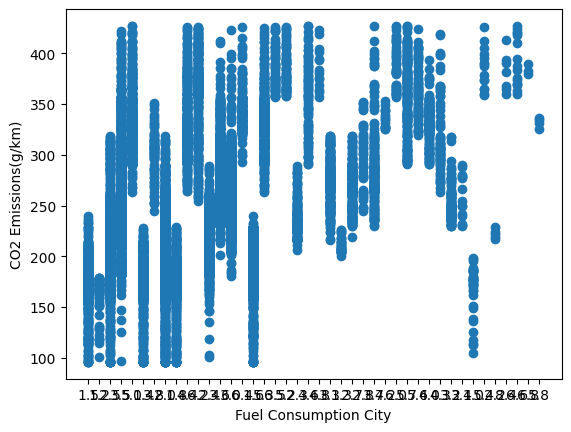

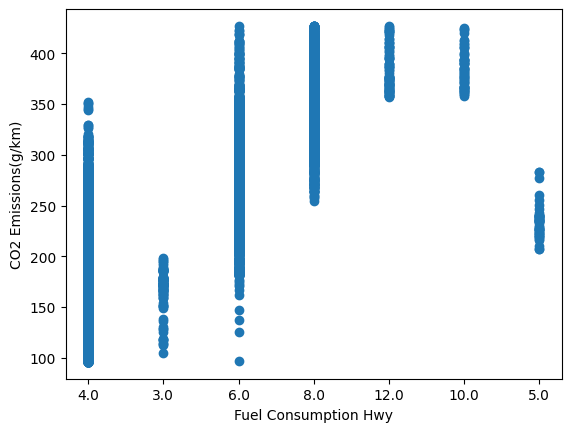

In [150]:
plt.scatter(df["Engine Size(L)"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [151]:
print(len(df))
df.to_csv("preprocessing.csv")

14937


In [152]:
df.head(20)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,1,MITSU,SUV - SMALL,1.5,4.0,AV8,X,0.00119,0.07200,0.098000,208
17,18,MITSU,COMPACT,1.2,3.0,AV,X,0.00079,0.00079,7.900000,167
19,20,BARUSU,COMPACT,2.5,4.0,M6,Z,15.90000,0.09500,13.020000,305
22,23,GONDA,SUV - SMALL,3.5,6.0,A6,X,11.40000,10.50000,0.110000,263
25,26,LAND CRAWLER,SUV - STANDARD,5.0,8.0,AS8,E,0.00177,0.11600,0.001495,367
28,29,CHEVO,SUV - SMALL,1.4,4.0,AS6,X,0.00083,0.00068,7.620000,191
30,31,RYUNDAI,FULL-SIZE,3.8,6.0,AS8,X,0.00123,11.80000,12.070000,314
34,35,FOLKSWA,SUV - SMALL,2.0,4.0,AS8,X,14.30000,9.50000,0.121000,223
35,36,MITSU,COMPACT,2.0,4.0,AM6,Z,14.00000,7.30000,10.980000,311
36,37,KIO,MID-SIZE,1.8,4.0,M6,X,0.09500,0.07900,0.000878,196


In [153]:
len(df)

14937

In [154]:
df.to_csv("preprocessing_dt.csv")